# Setup

In [1]:
# import modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import nltk
# nltk.download('punkt')
# nltk.download('stopwords')
# nltk.download('wordnet')
# nltk.download('omw-1.4')
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud
import ast
import seaborn as sns

In [2]:
results_df = pd.read_csv('../../data/topic_model_results.csv',  lineterminator='\n', encoding='utf8')

In [3]:
results_df.head()

,text,timestamp,username,link,link_id,parent_id,id,subreddit_id,moderation\r,hateful Score,hateful HR,toxic Score,toxic HR\r,Topic Number,Topic\r
0,i think most singaporeans dont give a damn who...,11/4/2020 15:49,invigo79,/r/singapore/comments/fz7vtl/im_quite_interest...,t3_fz7vtl,t3_fz7vtl,fn3gbrg,t5_2qh8c,"{'removal_reason': None, 'collapsed': False, '...",-0.582897,0,-0.419338,0,0,Political\r
1,fair point the secrecy aspect of it slipped my...,3/4/2020 9:59,potatetoe_tractor,/r/singapore/comments/fu3axm/government_to_tab...,t3_fu3axm,t1_fmasya5,fmau5k3,t5_2qh8c,"{'removal_reason': None, 'collapsed': False, '...",-1.116736,0,-1.869363,0,4,Relationships\r
2,range,15/2/2020 15:07,CrossfittJesus,/r/singapore/comments/f4ac70/what_is_ps_defens...,t3_f4ac70,t3_f4ac70,fhp05xc,t5_2qh8c,"{'removal_reason': None, 'collapsed': False, '...",-1.027191,0,-0.798016,0,4,Relationships\r
3,gt this is binary thinking because you think t...,4/6/2020 7:07,nomad80,/r/singapore/comments/gw55cx/notoracism/fsu4fyd/,t3_gw55cx,t1_fsu3dsf,fsu4fyd,t5_2qh8c,"{'removal_reason': None, 'collapsed': False, '...",-0.419287,0,1.119165,1,5,Crime\r
4,boo boo poor u lmao,31/10/2020 13:52,pirorok,/r/singapore/comments/jl6abo/rsingapore_random...,t3_jl6abo,t1_gap4e9y,gap4vkl,t5_2qh8c,"{'removal_reason': None, 'collapsed': False, '...",-0.952112,0,1.197503,1,9,Unknown\r


In [4]:
# Remove \r from column names
results_df.columns = results_df.columns.str.strip()

# Strip \r and other whitespace characters from a specific column (e.g., 'column_name')
results_df['Topic'] = results_df['Topic'].str.strip()

results_df.head()

,text,timestamp,username,link,link_id,parent_id,id,subreddit_id,moderation,hateful Score,hateful HR,toxic Score,toxic HR,Topic Number,Topic
0,i think most singaporeans dont give a damn who...,11/4/2020 15:49,invigo79,/r/singapore/comments/fz7vtl/im_quite_interest...,t3_fz7vtl,t3_fz7vtl,fn3gbrg,t5_2qh8c,"{'removal_reason': None, 'collapsed': False, '...",-0.582897,0,-0.419338,0,0,Political
1,fair point the secrecy aspect of it slipped my...,3/4/2020 9:59,potatetoe_tractor,/r/singapore/comments/fu3axm/government_to_tab...,t3_fu3axm,t1_fmasya5,fmau5k3,t5_2qh8c,"{'removal_reason': None, 'collapsed': False, '...",-1.116736,0,-1.869363,0,4,Relationships
2,range,15/2/2020 15:07,CrossfittJesus,/r/singapore/comments/f4ac70/what_is_ps_defens...,t3_f4ac70,t3_f4ac70,fhp05xc,t5_2qh8c,"{'removal_reason': None, 'collapsed': False, '...",-1.027191,0,-0.798016,0,4,Relationships
3,gt this is binary thinking because you think t...,4/6/2020 7:07,nomad80,/r/singapore/comments/gw55cx/notoracism/fsu4fyd/,t3_gw55cx,t1_fsu3dsf,fsu4fyd,t5_2qh8c,"{'removal_reason': None, 'collapsed': False, '...",-0.419287,0,1.119165,1,5,Crime
4,boo boo poor u lmao,31/10/2020 13:52,pirorok,/r/singapore/comments/jl6abo/rsingapore_random...,t3_jl6abo,t1_gap4e9y,gap4vkl,t5_2qh8c,"{'removal_reason': None, 'collapsed': False, '...",-0.952112,0,1.197503,1,9,Unknown


In [5]:
# rename new columns
results_df.rename(columns={
    'hateful Score': 'hateful_score',
    'hateful HR': 'hateful_prediction',
    'toxic Score': 'toxic_score',
    'toxic HR': 'toxic_prediction',
    'Topic Number': 'topic_number',
    'Topic': 'topic'
}, inplace=True)

results_df.head()

,text,timestamp,username,link,link_id,parent_id,id,subreddit_id,moderation,hateful_score,hateful_prediction,toxic_score,toxic_prediction,topic_number,topic
0,i think most singaporeans dont give a damn who...,11/4/2020 15:49,invigo79,/r/singapore/comments/fz7vtl/im_quite_interest...,t3_fz7vtl,t3_fz7vtl,fn3gbrg,t5_2qh8c,"{'removal_reason': None, 'collapsed': False, '...",-0.582897,0,-0.419338,0,0,Political
1,fair point the secrecy aspect of it slipped my...,3/4/2020 9:59,potatetoe_tractor,/r/singapore/comments/fu3axm/government_to_tab...,t3_fu3axm,t1_fmasya5,fmau5k3,t5_2qh8c,"{'removal_reason': None, 'collapsed': False, '...",-1.116736,0,-1.869363,0,4,Relationships
2,range,15/2/2020 15:07,CrossfittJesus,/r/singapore/comments/f4ac70/what_is_ps_defens...,t3_f4ac70,t3_f4ac70,fhp05xc,t5_2qh8c,"{'removal_reason': None, 'collapsed': False, '...",-1.027191,0,-0.798016,0,4,Relationships
3,gt this is binary thinking because you think t...,4/6/2020 7:07,nomad80,/r/singapore/comments/gw55cx/notoracism/fsu4fyd/,t3_gw55cx,t1_fsu3dsf,fsu4fyd,t5_2qh8c,"{'removal_reason': None, 'collapsed': False, '...",-0.419287,0,1.119165,1,5,Crime
4,boo boo poor u lmao,31/10/2020 13:52,pirorok,/r/singapore/comments/jl6abo/rsingapore_random...,t3_jl6abo,t1_gap4e9y,gap4vkl,t5_2qh8c,"{'removal_reason': None, 'collapsed': False, '...",-0.952112,0,1.197503,1,9,Unknown


In [6]:
results_df['moderation'] = results_df['moderation'].apply(ast.literal_eval)

In [7]:
# Create boolean flags for collapsed, deleted, low-score, removed, and controversial comments
results_df['is_collapsed'] = results_df['moderation'].apply(lambda x: x.get('collapsed') == True)
results_df['is_deleted'] = results_df['moderation'].apply(lambda x: x.get('collapsed_reason_code') == 'DELETED')
results_df['is_controversial'] = results_df['moderation'].apply(lambda x: x.get('controversiality') == 1)

In [8]:
results_df['is_controversial'].head()

0    False
1    False
2    False
3    False
4    False
Name: is_controversial, dtype: bool

In [9]:
# convert data to appropriate datatypes
results_df['text'] = results_df['text'].astype(str)
results_df['timestamp'] = pd.to_datetime(results_df['timestamp'], format='%d/%m/%Y %H:%M')
results_df['username'] = results_df['username'].astype(str)
results_df['link'] = results_df['link'].astype(str)
results_df['link_id'] = results_df['link_id'].astype(str)
results_df['parent_id'] = results_df['parent_id'].astype(str)
results_df['id'] = results_df['id'].astype(str)
results_df['subreddit_id'] = results_df['subreddit_id'].astype(str)
results_df['moderation'] = results_df['moderation'].tolist()
results_df['hateful_score'] = results_df['hateful_score'].astype('float32')
results_df['hateful_prediction'] = results_df['hateful_prediction'].astype('int16')
results_df['toxic_score'] = results_df['toxic_score'].astype('float32')
results_df['toxic_prediction'] = results_df['toxic_prediction'].astype('int16')
results_df['topic_number'] = results_df['topic_number'].astype('category')
results_df['topic'] = results_df['topic'].astype('category')

In [10]:
# Group by year and month to track moderation actions over time
results_df['year_month'] = results_df['timestamp'].dt.to_period('M')

# extract date from datetime stamp
results_df['timestamp'] = results_df['timestamp'].dt.date

results_df['timestamp'].head()

0    2020-04-11
1    2020-04-03
2    2020-02-15
3    2020-06-04
4    2020-10-31
Name: timestamp, dtype: object

# 1. Most Toxic and Hateful Users

In [11]:
# Group by 'username' and calculate the mean for 'hateful_score' and 'toxic_score'
average_scores = results_df.groupby('username')[['hateful_score', 'toxic_score']].mean()

# Sort by 'hateful_score' and 'toxic_score' in descending order to find the highest averages
highest_hateful = average_scores.sort_values(by='hateful_score', ascending=False)
highest_toxic = average_scores.sort_values(by='toxic_score', ascending=False)

# Display the top usernames with the highest average scores
top_hateful_usernames = highest_hateful.head()
top_toxic_usernames = highest_toxic.head()

In [14]:
# Top usernames with highest average hateful_score
print(top_hateful_usernames)

                 hateful_score  toxic_score
username                                   
Lasi22998877          0.714551     0.970606
kukkuduku             0.594004     0.709278
spikey_hedgehog       0.545071    -0.960435
abxtract              0.534171     0.283492
subandhu23            0.492813     0.130181


In [15]:
# Top usernames with highest average toxic_score
print(top_toxic_usernames)

                      hateful_score  toxic_score
username                                        
nojambruhh                -0.776293     2.088420
SST_1972                  -0.489331     1.980335
Ok_Professional_1717      -0.761024     1.965268
Bungermanbruggs           -0.856208     1.952328
DueAdministration404      -0.605033     1.907401


# 2. Distribution of users plotted by hateful and toxic scores

In [12]:
# Group by 'username' and calculate the mean for 'hateful_score' and 'toxic_score'
average_scores = results_df.groupby('username')[['hateful_score', 'toxic_score']].mean()

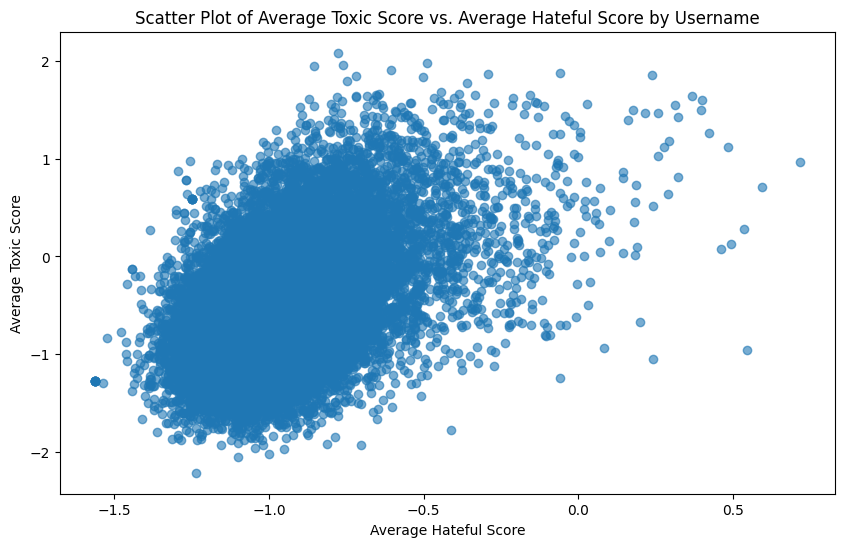

In [13]:
# Plot the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(average_scores['hateful_score'], average_scores['toxic_score'], alpha=0.6)

# Add labels and title
plt.xlabel('Average Hateful Score')
plt.ylabel('Average Toxic Score')
plt.title('Scatter Plot of Average Toxic Score vs. Average Hateful Score by Username')

# Optionally, add usernames as labels on the points
# for username, row in average_scores.iterrows():
#     plt.text(row['hateful_score'], row['toxic_score'], username, fontsize=8, alpha=0.7)

# Show plot
plt.show()

From the scatterplot, we see that most users have an average toxic score of between -2 to 1, and an average hateful score between -1.5 to -0.5. Thus, Toxicity seems to be the bigger issue.

There are a good number of users that have an average toxic score of more than 1, and a handful of users with average toxic score near 2.

In [14]:
# Group by 'username' and calculate the mean of 'toxic_score' for each username
average_toxic_scores = results_df.groupby('username')['toxic_score'].mean()

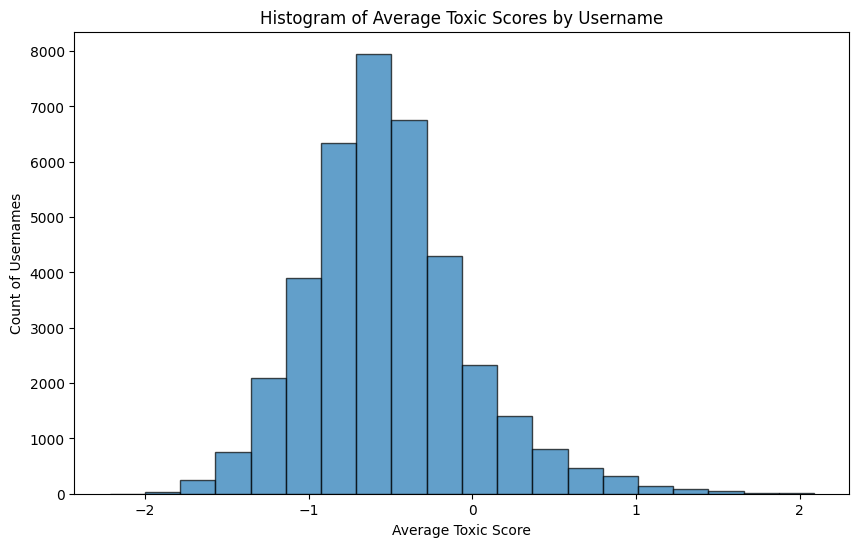

In [15]:
# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(average_toxic_scores, bins=20, edgecolor='black', alpha=0.7)

# Add labels and title
plt.xlabel('Average Toxic Score')
plt.ylabel('Count of Usernames')
plt.title('Histogram of Average Toxic Scores by Username')

# Show plot
plt.show()

This histogram narrows down the to the distribution of users, with their respective average toxic scores

# 3. Find out users with comments that are either all toxic or all hateful

In [16]:
# Find usernames with an average toxic_prediction of 1
toxic_users = results_df.groupby('username')['toxic_prediction'].mean()
toxic_users = toxic_users[toxic_users == 1].index.tolist()

In [27]:
# Users with an average toxic_prediction of 1
print(toxic_users)
print(len(toxic_users))

['------Kaiser------', '-BadKarma--', '-PostCat-', '-kennthelegend-', '035753', '0xaika', '123Throwawayyy123', '124r', '12amonreddit', '166genius', '18WheelsATrollin', '20TOGI09', '20aydan04', '23_stab_wounds', '24122020', '247aids', '2923throwaway', '2manslkh', '3Kassogtha3', '3kxi', '3molgasm', '4_Yazreeq_20', '4bility', '4everdelayed', '4x4is16Legs', '54tanxk', '5inchAngMoPeePee', '66699999', '68725344757', '711shadownova', '88dude88', '8bitpixelanimechara', '92037', 'AINAZ_MALAYSIA', 'AJAYANAND99', 'ASharpRazor', 'A_bored_potato', 'A_reddit_bro', 'AasisV', 'AbbreviationsOk6666', 'AccToMasturbate', 'Accomplished-Wolf2', 'Acrobatic-Dog3981', 'Acrobatic-Reward-416', 'Activate-Almonds-341', 'Actual_Association43', 'Ad-mortem-innu-micus', 'AdAcrobatic7236', 'AdAnxious2059', 'AdBig8789', 'AdConnect2633', 'AdFearless1541', 'AdFine1421', 'AdHot1979', 'AdPleasant9599', 'Additional-Diver-451', 'Adept_Educator_3388', 'AdministrativeTax888', 'Admirable-Duck-7286', 'Adorable-Challenge72', 'Adva

In [17]:
# Find usernames with an average hateful_prediction of 1
hateful_users = results_df.groupby('username')['hateful_prediction'].mean()
hateful_users = hateful_users[hateful_users == 1].index.tolist()

In [29]:
# Users with an average hateful_prediction of 1
print(hateful_users)
print(len(hateful_users))

['124r', '3inchPajeetDick', '8bitpixelanimechara', 'A1ais', 'A_C_A__B', 'AbySs_Dante', 'AdConnect2633', 'Additional_You2280', 'AdministrativeTax888', 'Administrative_Cat22', 'Affectionate_Desk990', 'Alternative_Bike_180', 'AmazingAndy', 'Analyst-Working', 'Any_Elk_9520', 'ApkalFR', 'AshiinFreshspawn', 'Ass_dermatologist', 'Ast0rath', 'Axolotlet', 'AyamBrandChilliTuna', 'AzothTreaty', 'Babawhiteshit', 'Better_Ad_8885', 'BiteLevel000', 'Bongbongbanger', 'Broad-Job-5503', 'CabbagesLord', 'CapitalFly1', 'CarefulIce97', 'DaMonehhLebowski', 'Damewolfe99', 'DatYoosernameistaken', 'DenisWB', 'Dheeraj_PG', 'DiamondCheque', 'Difficult_Quote5984', 'Doragetsexplored', 'DriftingOtaku901', 'DweadPiwateWoberts', 'Eelias22', 'Eldeon85', 'ElectricBaaa', 'EmbarrassedAd8889', 'EntrepreneurPatient6', 'Equal_Armadillo_1695', 'Esophallic', 'Felynxx', 'Few-Kaleidoscope-864', 'Final_Listen_7394', 'Fine_Band7330', 'Formal_Door3104', 'Frostivus', 'Gdia94', 'Ginormous99', 'Godofdestruction123', 'HatchBeast', 'Ha

There are a total of 2862 and 271 users who post comments that are all toxic or all hateful (predicted by Lionguard) respectively. We can consider blocking off these users entirely.

# 4. Compare most toxic users with the "average" user

In [20]:
# Ensure 'is_collapsed' is treated as a numeric column (if it's not already)
results_df['is_collapsed'] = results_df['is_collapsed'].astype(float)

# Group by 'username' and calculate the mean for 'toxic_score' and 'is_collapsed'
average_toxic_data_by_user = results_df.groupby('username').agg(
    average_toxic_score=('toxic_score', 'mean'),
    mean_is_collapsed=('is_collapsed', 'mean')
)

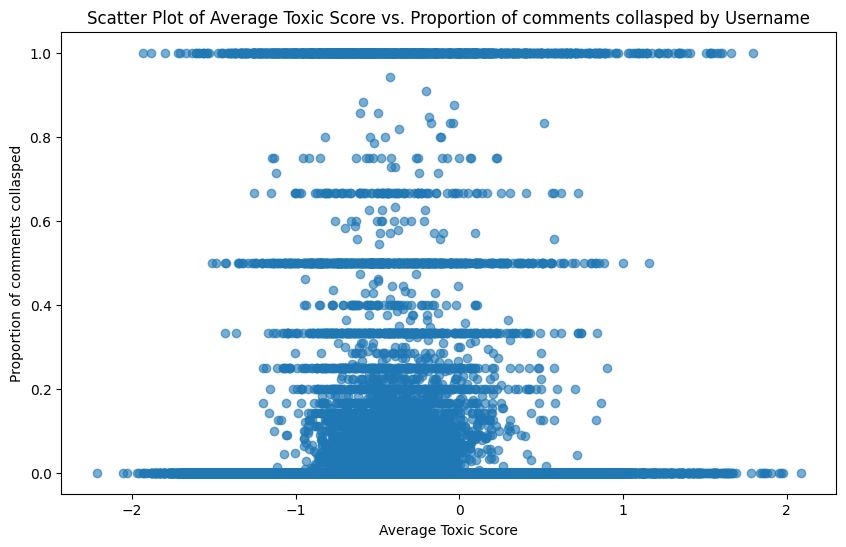

In [21]:
# Plot the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(average_toxic_data_by_user['average_toxic_score'], average_toxic_data_by_user['mean_is_collapsed'], alpha=0.6)

# Add labels and title
plt.xlabel('Average Toxic Score')
plt.ylabel('Proportion of comments collasped')
plt.title('Scatter Plot of Average Toxic Score vs. Proportion of comments collasped by Username')

# Show plot
plt.show()

The scatterplot is quite flat even though we expect the plot to look more like a straight line passing through the origin, because more toxic users should receive more moderation.

Thus, we want to count the number of users that have an average toxic score of more than or equal to 1 and have no comments collasped.

In [24]:
# Filter users based on the conditions
filtered_users = average_toxic_data_by_user[(average_toxic_data_by_user['average_toxic_score'] >= 1) & (average_toxic_data_by_user['mean_is_collapsed'] == 0)]

# Count the number of users who meet the criteria
user_count = filtered_users.shape[0]

print(user_count)

271


In [22]:
# Ensure 'is_collapsed' is treated as a numeric column (if it's not already)
results_df['is_collapsed'] = results_df['is_collapsed'].astype(float)

# Group by 'username' and calculate the mean for 'toxic_score' and 'is_collapsed'
average_hateful_data_by_user = results_df.groupby('username').agg(
    average_hateful_score=('hateful_score', 'mean'),
    mean_is_collapsed=('is_collapsed', 'mean')
)

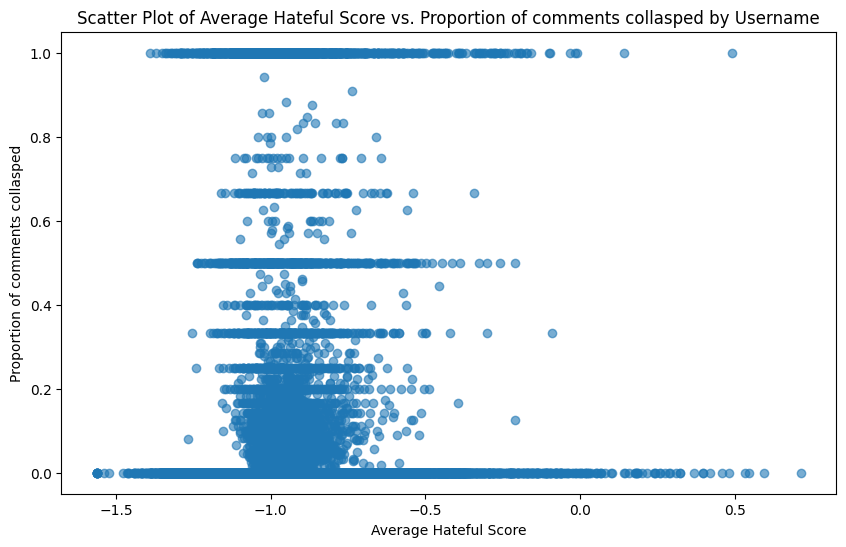

In [23]:
# Plot the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(average_hateful_data_by_user['average_hateful_score'], average_hateful_data_by_user['mean_is_collapsed'], alpha=0.6)

# Add labels and title
plt.xlabel('Average Hateful Score')
plt.ylabel('Proportion of comments collasped')
plt.title('Scatter Plot of Average Hateful Score vs. Proportion of comments collasped by Username')

# Show plot
plt.show()